In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
intraday = pd.read_csv('data/intraDay.csv', dayfirst = True, decimal =',' , index_col=None, parse_dates=[0])

In [6]:
intraday['Date'] = pd.to_datetime(intraday['Date'])
intraday.columns = ['Date', 'Com', 'Fxi', 'Tes']
data = intraday.set_index(['Date']).sort_index(axis=0, ascending=True)
#print len(intraday['2'])

In [7]:
data.head()

,Com,Fxi,Tes
Date,,,
2015-08-28 08:00:00,41.99,3167.0,7.650
2015-08-28 08:05:00,42.15,3174.0,7.641
2015-08-28 08:10:00,42.23,3179.0,7.650
2015-08-28 08:20:00,42.16,3170.5,7.650
2015-08-28 08:25:00,42.25,3159.0,7.635


In [8]:
nn = data.shift(-1)
rtn = (((nn-data)/nn).shift(1)).fillna(value=0)
rtn.columns = ['Com_rtn', 'Fxi_rtn', 'Tes_rtn']
rtn = rtn.reset_index(['Date'])
rtn.head()

,Date,Com_rtn,Fxi_rtn,Tes_rtn
0,2015-08-28 08:00:00,0.000000,0.000000,0.000000
1,2015-08-28 08:05:00,0.003796,0.002205,-0.001178
2,2015-08-28 08:10:00,0.001894,0.001573,0.001176
3,2015-08-28 08:20:00,-0.001660,-0.002681,0.000000
4,2015-08-28 08:25:00,0.002130,-0.003640,-0.001965


In [9]:
# create a fitted model in one line
import statsmodels.formula.api as smf
lm = smf.ols('Tes_rtn ~ Fxi_rtn', data=rtn).fit()
print lm.summary()
# print the coefficients
lm.params

                            OLS Regression Results                            
Dep. Variable:                Tes_rtn   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1851.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        11:38:21   Log-Likelihood:                 33482.
No. Observations:                6384   AIC:                        -6.696e+04
Df Residuals:                    6382   BIC:                        -6.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.284e-06    1.6e-05      0.581      0.5

Intercept    0.000009
Fxi_rtn      0.381256
dtype: float64

In [10]:
rr = lm.params[1]*rtn['Fxi_rtn'] + lm.params[0] - rtn['Tes_rtn']
rtn['error'] = rr

In [11]:
rtn.head()

,Date,Com_rtn,Fxi_rtn,Tes_rtn,error
0,2015-08-28 08:00:00,0.000000,0.000000,0.000000,0.000009
1,2015-08-28 08:05:00,0.003796,0.002205,-0.001178,0.002028
2,2015-08-28 08:10:00,0.001894,0.001573,0.001176,-0.000568
3,2015-08-28 08:20:00,-0.001660,-0.002681,0.000000,-0.001013
4,2015-08-28 08:25:00,0.002130,-0.003640,-0.001965,0.000586


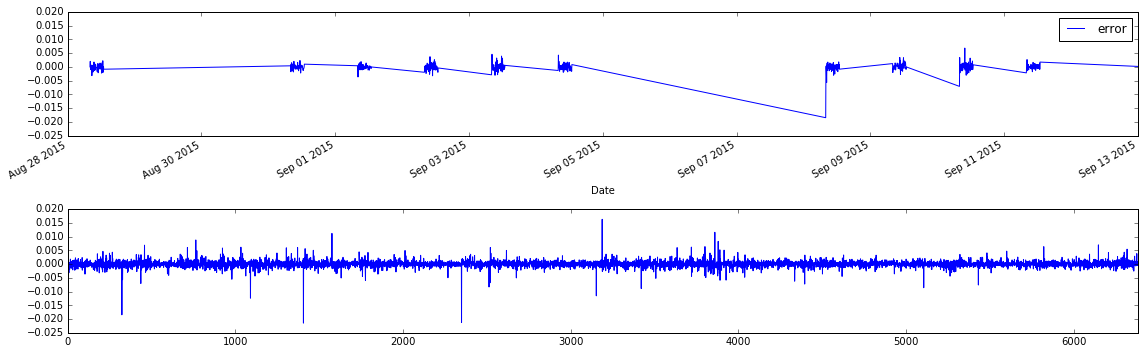

In [12]:
xx =rtn.Date.astype(np.int64) # To convert dates to integers
fig, axs = plt.subplots(2,1)
rtn.plot( x='Date', y='error', ax=axs[0],figsize=(16, 5))
axs[0].set_xlim(pd.Timestamp('2015-08-28'), pd.Timestamp('2015-09-13')) 
rtn['error'].plot( ax=axs[1])
plt.tight_layout()

In [13]:
nn = rtn.shift(-1)
error_1 = (rtn).fillna(value = 0) 

In [14]:
nn = data.shift(-1)
rtn = (((nn-data)/nn).shift(1)).fillna(value=0)
rtn.columns = ['Com_rtn', 'Fxi_rtn', 'Tes_rtn']
rtn = rtn.reset_index(['Date'])
rtn.head()

,Date,Com_rtn,Fxi_rtn,Tes_rtn
0,2015-08-28 08:00:00,0.000000,0.000000,0.000000
1,2015-08-28 08:05:00,0.003796,0.002205,-0.001178
2,2015-08-28 08:10:00,0.001894,0.001573,0.001176
3,2015-08-28 08:20:00,-0.001660,-0.002681,0.000000
4,2015-08-28 08:25:00,0.002130,-0.003640,-0.001965


In [15]:
error_1.head()

,Date,Com_rtn,Fxi_rtn,Tes_rtn,error
0,2015-08-28 08:00:00,0.000000,0.000000,0.000000,0.000009
1,2015-08-28 08:05:00,0.003796,0.002205,-0.001178,0.002028
2,2015-08-28 08:10:00,0.001894,0.001573,0.001176,-0.000568
3,2015-08-28 08:20:00,-0.001660,-0.002681,0.000000,-0.001013
4,2015-08-28 08:25:00,0.002130,-0.003640,-0.001965,0.000586


In [16]:
autocorr = np.array([error_1['error'].autocorr(lag=i+1) for i in range(250) ])

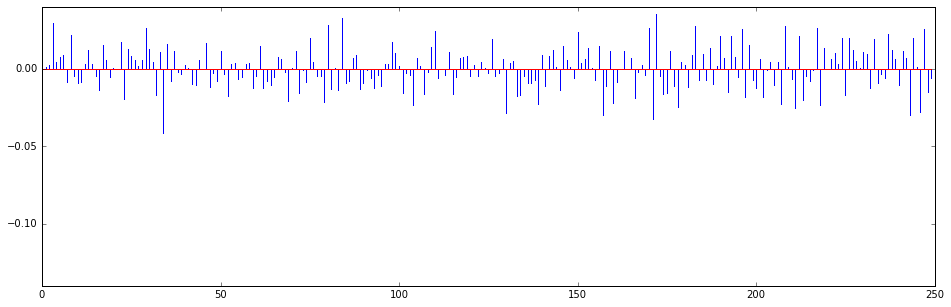

In [17]:
plt.figure(figsize=(16,5))
plt.stem(autocorr, markerfmt=' ')
plt.show()

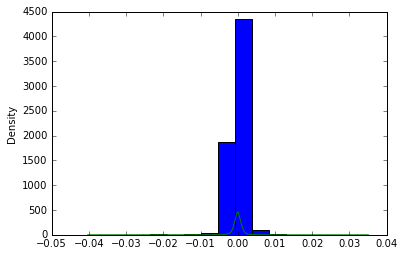

In [18]:
plt.figure()
error_1['error'].diff().hist()
error_1['error'].plot.kde()

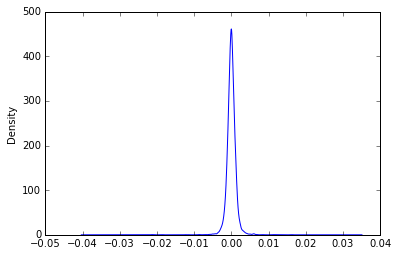

In [19]:
error_1['error'].plot.kde()

In [20]:
from pandas.tools.plotting import autocorrelation_plot

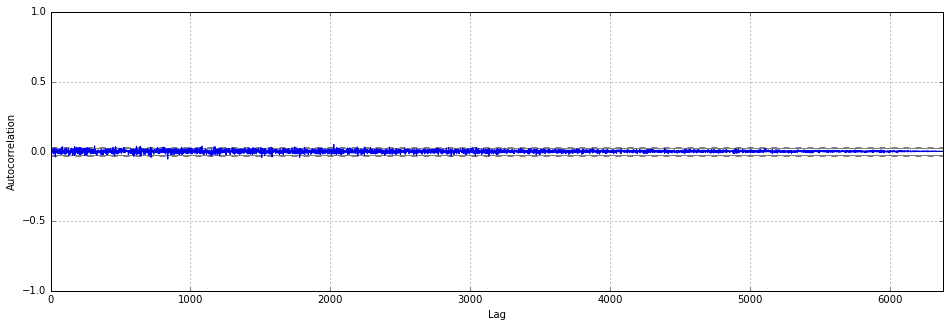

In [21]:
 plt.figure(figsize=(16,5))
plt.ylim= [-0.2,0.2]
autocorrelation_plot(error_1['error'])

KeyboardInterrupt: 

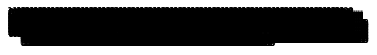

In [22]:
error_1['error'].hist(by=error_1['error'])